Fit a normal curve onto a sample data
- https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

In [181]:
myvoltage = "1.0"
filename = f"simulation_{myvoltage}V.txt" 
with open("./neuron_tanh_distribution/" + filename) as f:
    contents = f.read()

data = []

for line in contents.splitlines()[1:]:
    items = line.split('\t')
    if len(items) >= 2:
        data.append(items[-1])

data = list(map(float, data))

mode = max(set(data), key=data.count)
for d in data[:]:
    if d < mode:
        newitem = mode + abs(mode-d)
        data.append(newitem)
        pass

data = list(map(abs, data))
data = list(map(lambda x: x/float(myvoltage), data))


# Test random variable distribution
#data = norm.rvs(1.00207e-03, 0.27, size=500, random_state=1238)
print(len(data), mode)

1542 0.9525139


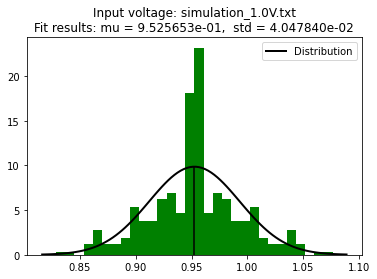

In [184]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=30, density=True, alpha=1.0, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="Distribution")
title = f"Input voltage: {filename}\n"
title += "Fit results: mu = %e,  std = %e" % (mu, std)
plt.title(title)

# draw vertical line
plt.vlines(x=mu, ymin=0, ymax=max(p), colors='k')
#plt.vlines(x=1, ymin=0, ymax=1.8, colors='red', linestyles="dashed", label="Ideal Mean")

plt.legend()
plt.savefig(f"plot_{myvoltage}V.png")
plt.show()

In [183]:
output = f"Filename: {filename}, "
output += f"Mean: {mu}, "
output += f"SD: {std}, "
print(output)

with open("neuron_tanh_distribution_result.txt", "a") as f:
    f.write(output + '\n')


Filename: simulation_1.0V.txt, Mean: 0.9525653207522699, SD: 0.040478397569126495, 
